In [36]:
import mne
import numpy as np
from boost_loc_roc.LoC_RoC import extract_loc_roc, Truncate_fif, plot_spectrogram
import pandas as pd
import os
import scipy

In [37]:
def load_data_larib(folder_path, patient_index):
    file_path = os.path.join(folder_path, f"EEG_{patient_index}.mat")
    mat_eeg = scipy.io.loadmat(file_path)
    eeg_data = mat_eeg["record"]
    sampling_freq = mat_eeg["Fs"][0][0]
    eeg_data_channel_1 = eeg_data[0]
    eeg_data_channel_2 = eeg_data[1]

    mat_ce = scipy.io.loadmat(os.path.join(folder_path, f"syr_{patient_index}.mat"))

    ce_time, ce_concentration = None, None

    for key in mat_ce.keys():
        if key.startswith("tCe"):
            ce_time = np.squeeze(mat_ce[key])
        elif key.startswith("Ce"):
            ce_concentration = np.squeeze(mat_ce[key])

    return (
        sampling_freq,
        eeg_data_channel_1,
        eeg_data_channel_2,
        ce_time,
        ce_concentration,
    )


# Placeholder function for converting EEG data to a format compatible with Truncate_fif and extract_loc_roc
def create_mne_raw(eeg_data_1, eeg_data_2, sampling_frequency):
    info = mne.create_info(
        ch_names=["EEG1", "EEG2"], sfreq=sampling_frequency, ch_types=["eeg", "eeg"]
    )
    raw = mne.io.RawArray([eeg_data_1, eeg_data_2], info)
    return raw

Patient 1


/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


178.15384615384616
Creating RawArray with float64 data, n_channels=2, n_times=3843402
    Range : 0 ... 3843401 =      0.000 ... 21573.494 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=1229442
    Range : 0 ... 1229441 =      0.000 ... 19514.937 secs
Ready.


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]


Effective window size : 8.127 (s)


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/eeg_features.py:151: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data(),
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/emi

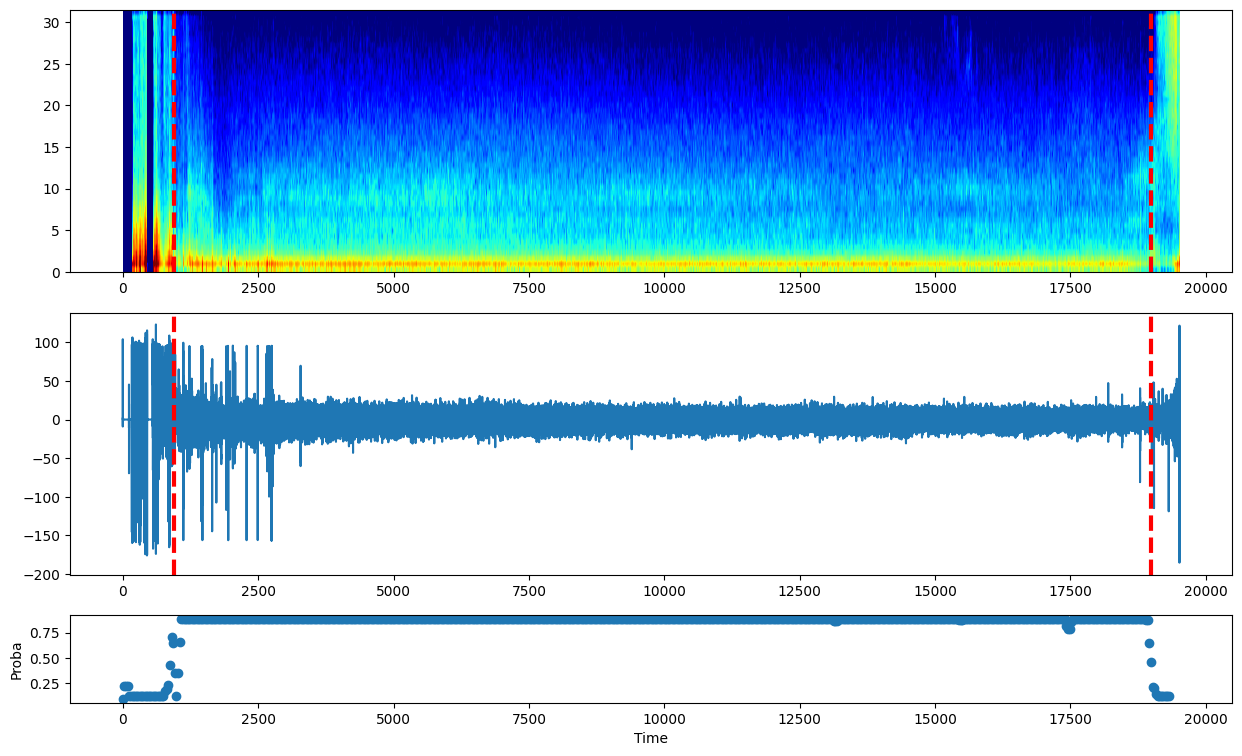

Patient 2
178.15384615384616
Creating RawArray with float64 data, n_channels=2, n_times=2393586
    Range : 0 ... 2393585 =      0.000 ... 13435.494 secs
Ready.


/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Creating RawArray with float64 data, n_channels=2, n_times=846436
    Range : 0 ... 846435 =      0.000 ... 13435.476 secs
Ready.


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]


Effective window size : 8.127 (s)


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/eeg_features.py:151: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data(),
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/emi

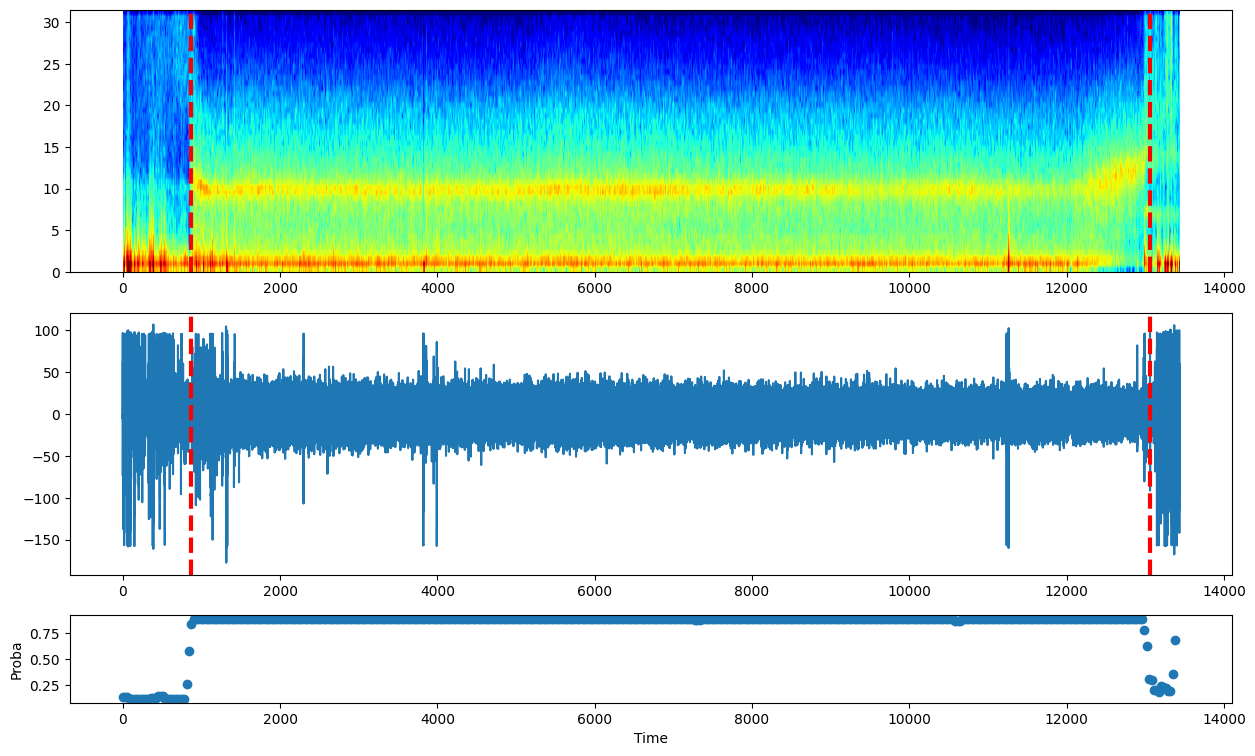

Patient 3
178.15384615384616
Creating RawArray with float64 data, n_channels=2, n_times=2671506
    Range : 0 ... 2671505 =      0.000 ... 14995.494 secs
Ready.


/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Creating RawArray with float64 data, n_channels=2, n_times=888207
    Range : 0 ... 888206 =      0.000 ... 14098.508 secs
Ready.


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]


Effective window size : 8.127 (s)


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/eeg_features.py:151: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data(),
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/emi

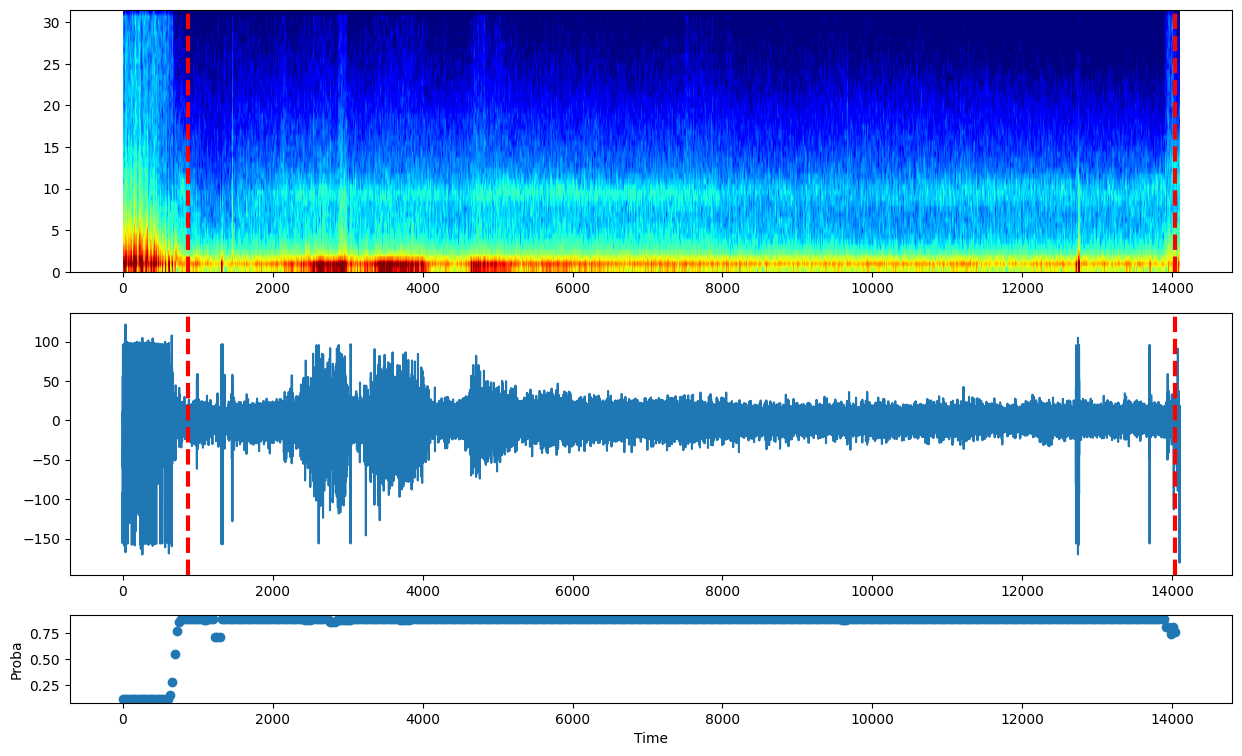

Patient 4
178.15384615384616
Creating RawArray with float64 data, n_channels=2, n_times=2287050
    Range : 0 ... 2287049 =      0.000 ... 12837.494 secs
Ready.


/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Creating RawArray with float64 data, n_channels=2, n_times=796789
    Range : 0 ... 796788 =      0.000 ... 12647.429 secs
Ready.


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]


Effective window size : 8.127 (s)


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/eeg_features.py:151: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data(),
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/emi

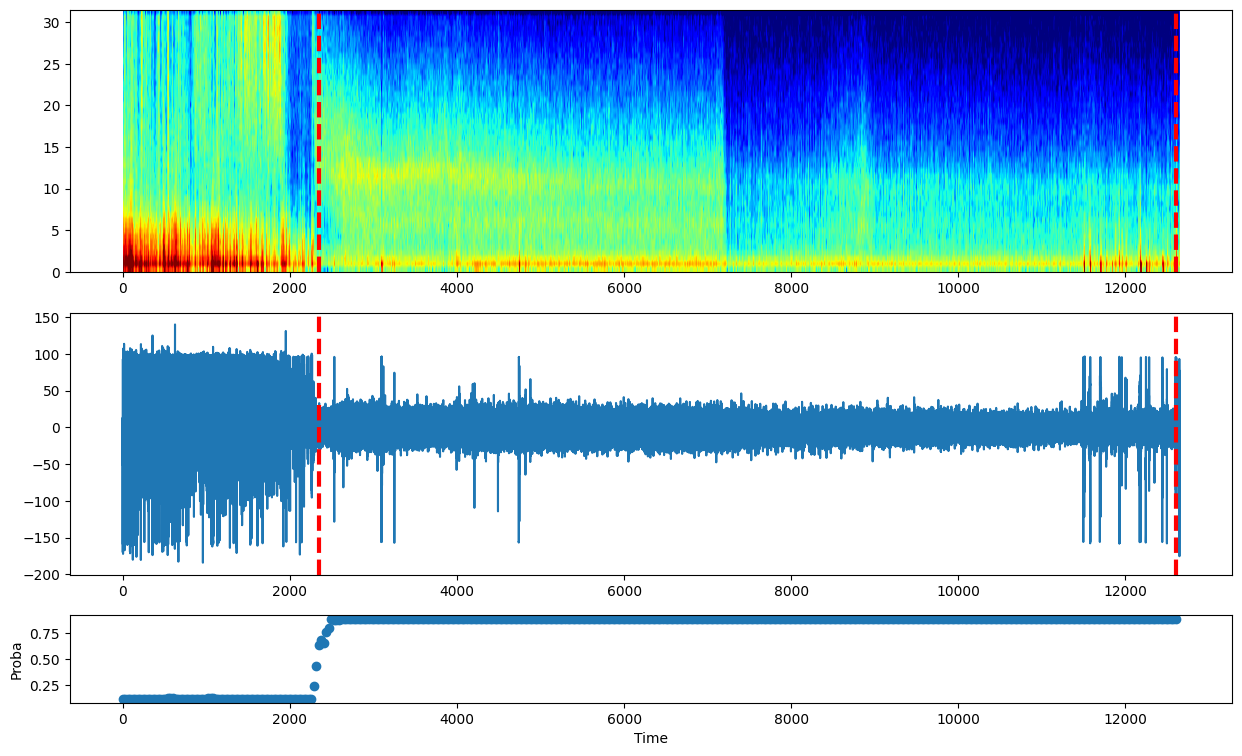

Patient 5
89.07692307692308
Creating RawArray with float64 data, n_channels=2, n_times=898608
    Range : 0 ... 898607 =      0.000 ... 10087.989 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=632281
    Range : 0 ... 632280 =      0.000 ... 10036.190 secs
Ready.


/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]


Effective window size : 8.127 (s)


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/eeg_features.py:151: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data(),
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/emi

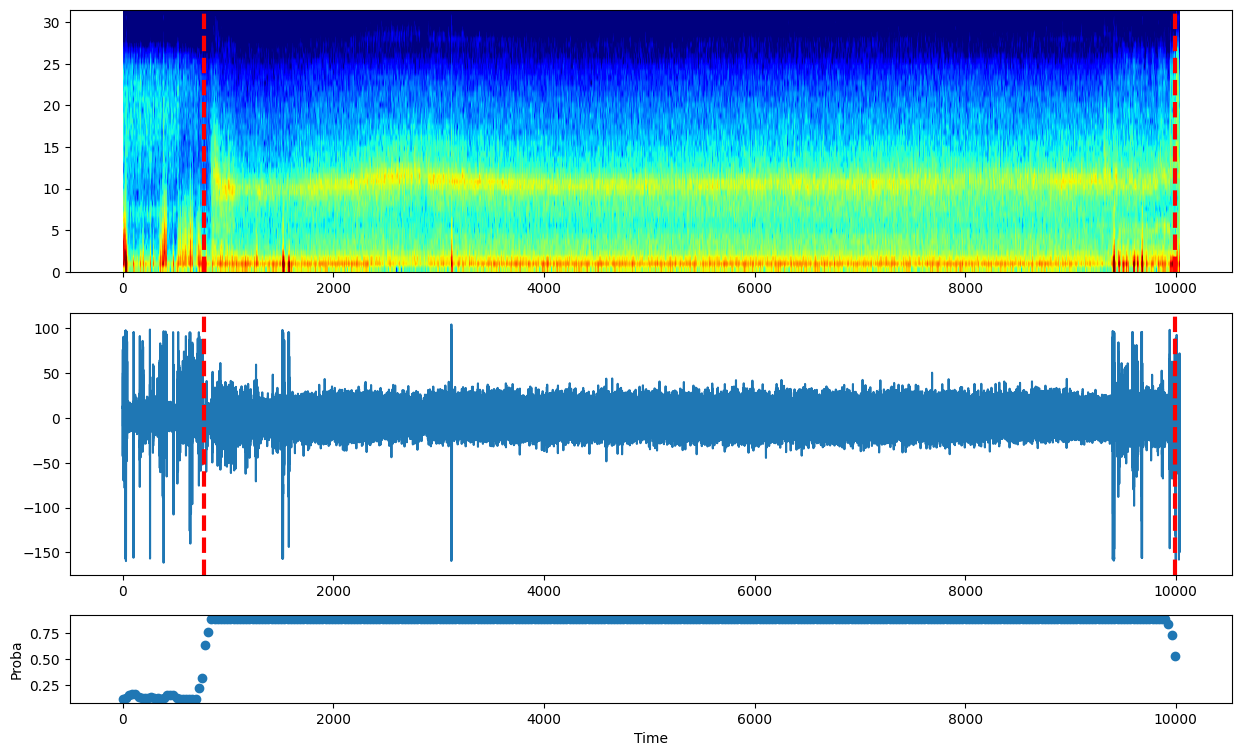

Patient 6
178.15384615384616
Creating RawArray with float64 data, n_channels=2, n_times=3391782
    Range : 0 ... 3391781 =      0.000 ... 19038.494 secs
Ready.


/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Creating RawArray with float64 data, n_channels=2, n_times=1145547
    Range : 0 ... 1145546 =      0.000 ... 18183.270 secs
Ready.


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]


Effective window size : 8.127 (s)


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/eeg_features.py:151: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data(),
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/emi

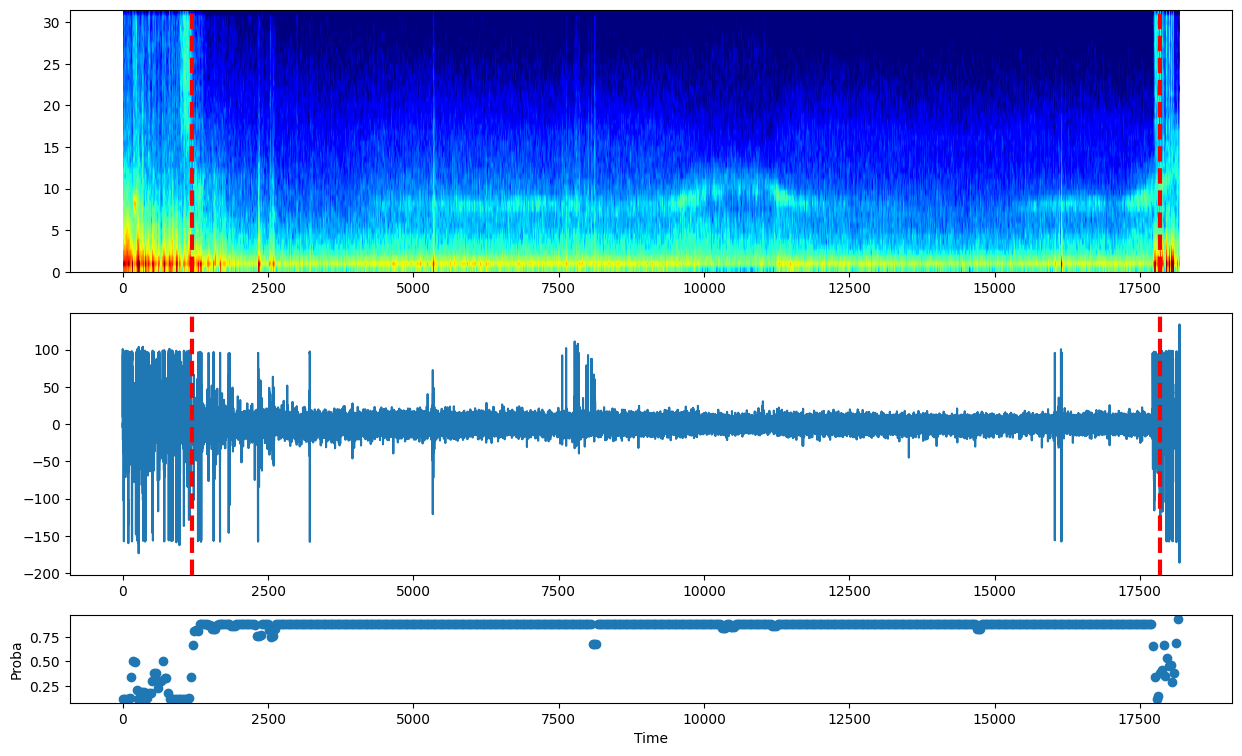

Patient 7
178.15384615384616
Creating RawArray with float64 data, n_channels=2, n_times=2460750
    Range : 0 ... 2460749 =      0.000 ... 13812.494 secs
Ready.


/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Creating RawArray with float64 data, n_channels=2, n_times=829692
    Range : 0 ... 829691 =      0.000 ... 13169.698 secs
Ready.


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]


Effective window size : 8.127 (s)


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/eeg_features.py:151: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data(),
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/emi

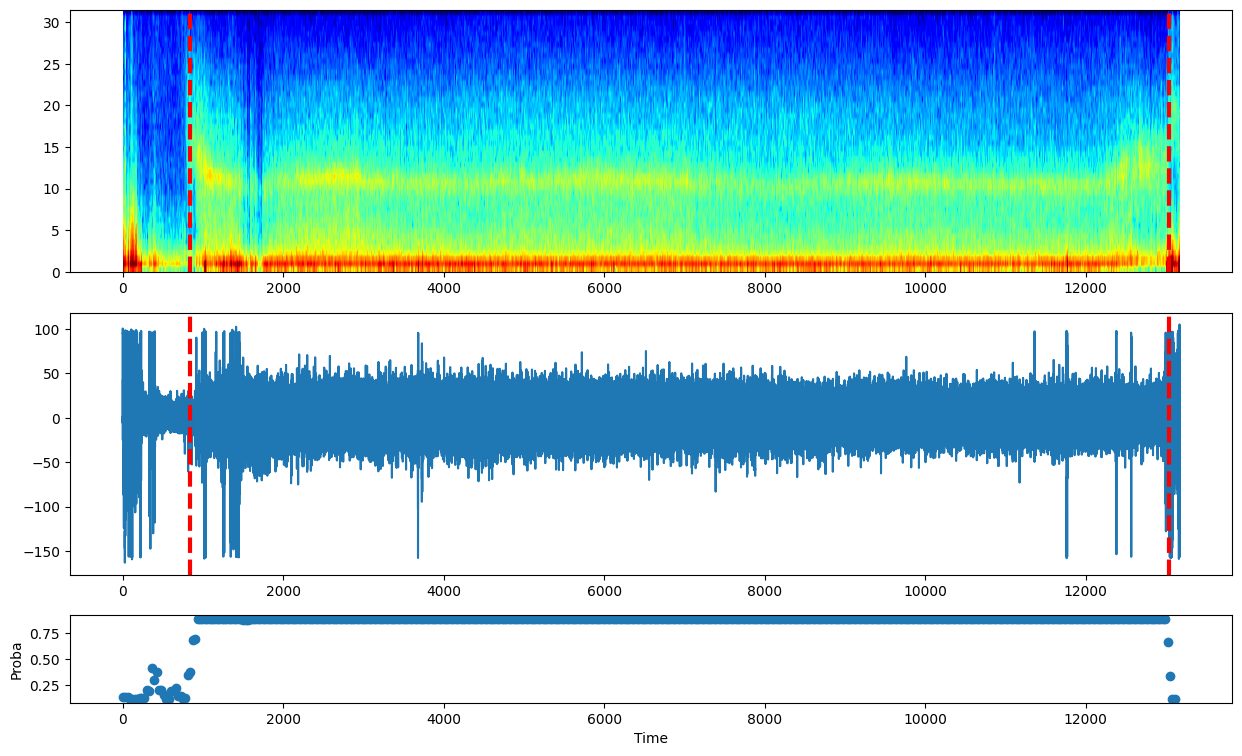

Patient 8
178.15384615384616
Creating RawArray with float64 data, n_channels=2, n_times=1598040
    Range : 0 ... 1598039 =      0.000 ...  8969.994 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=534769
    Range : 0 ... 534768 =      0.000 ...  8488.381 secs
Ready.


/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]


Effective window size : 8.127 (s)


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/eeg_features.py:151: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data(),
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/emi

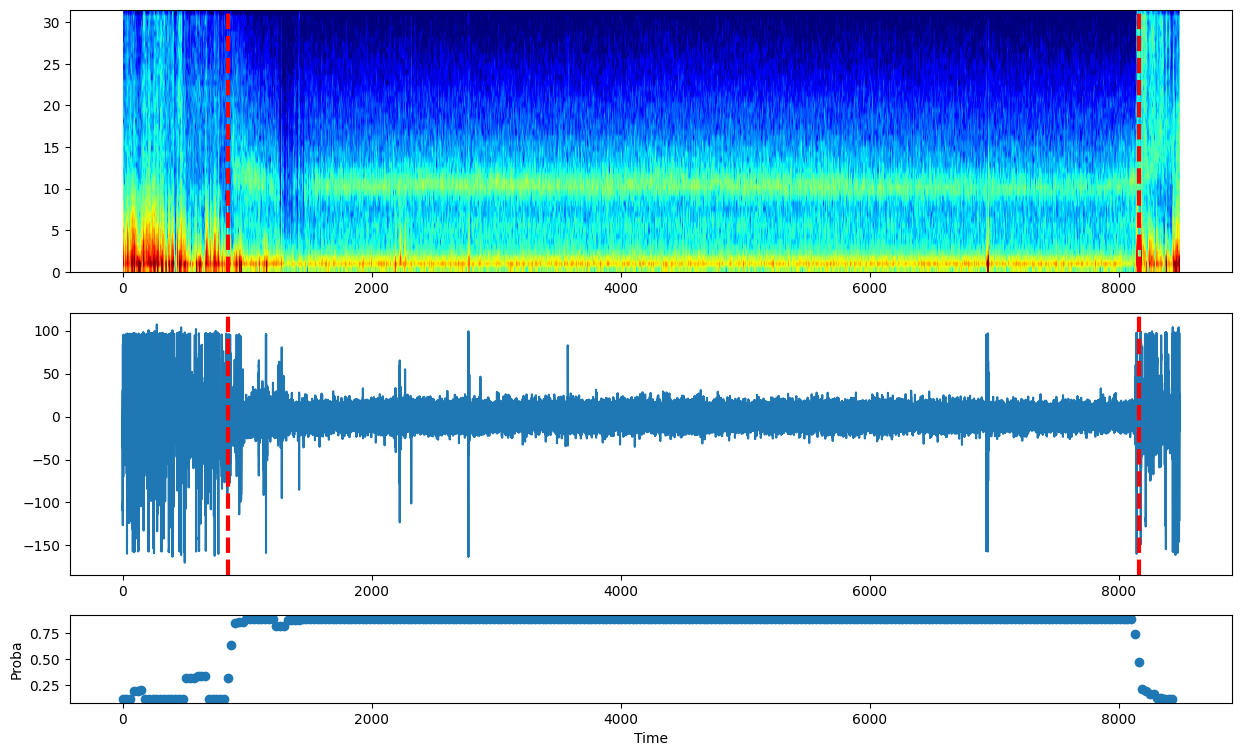

Patient 9
178.15384615384616
Creating RawArray with float64 data, n_channels=2, n_times=3750762
    Range : 0 ... 3750761 =      0.000 ... 21053.494 secs
Ready.


/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Creating RawArray with float64 data, n_channels=2, n_times=1310265
    Range : 0 ... 1310264 =      0.000 ... 20797.841 secs
Ready.


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]


Effective window size : 8.127 (s)


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/eeg_features.py:151: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data(),
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/emi

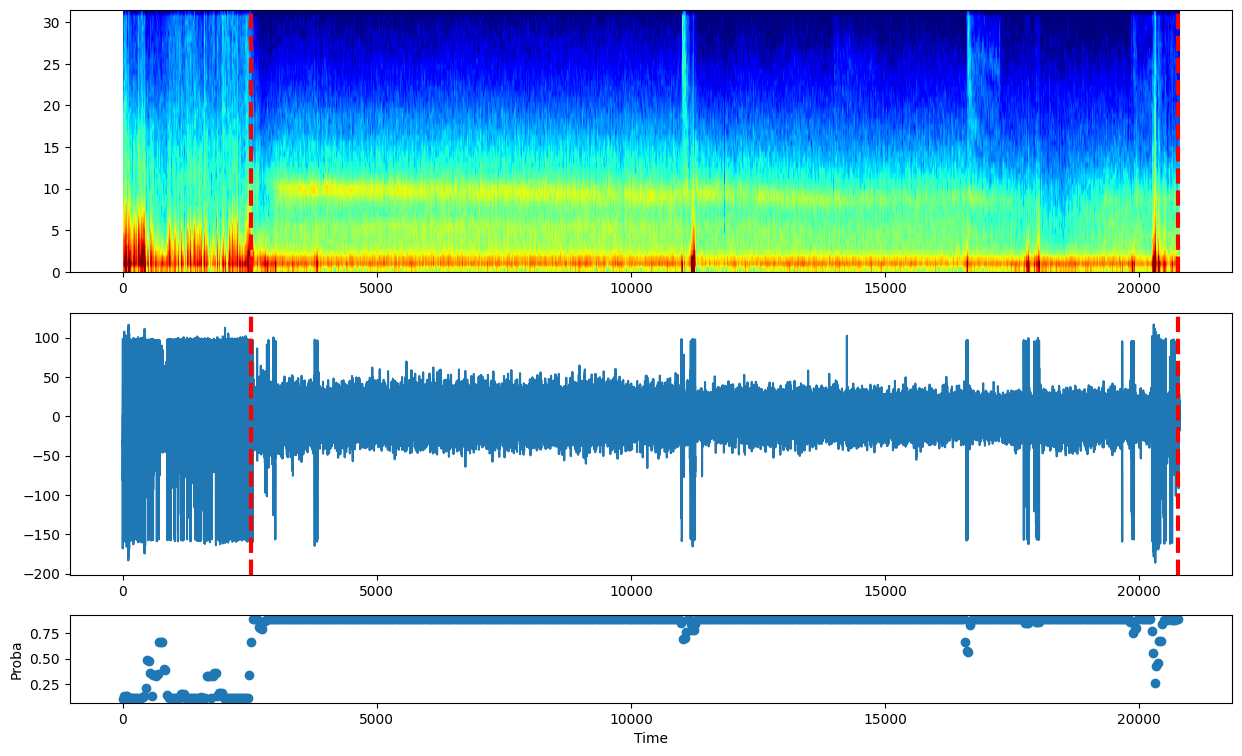

Patient 10
178.15384615384616
Creating RawArray with float64 data, n_channels=2, n_times=2476962
    Range : 0 ... 2476961 =      0.000 ... 13903.494 secs
Ready.


/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Creating RawArray with float64 data, n_channels=2, n_times=787867
    Range : 0 ... 787866 =      0.000 ... 12505.810 secs
Ready.


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]


Effective window size : 8.127 (s)


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/eeg_features.py:151: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data(),
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/emi

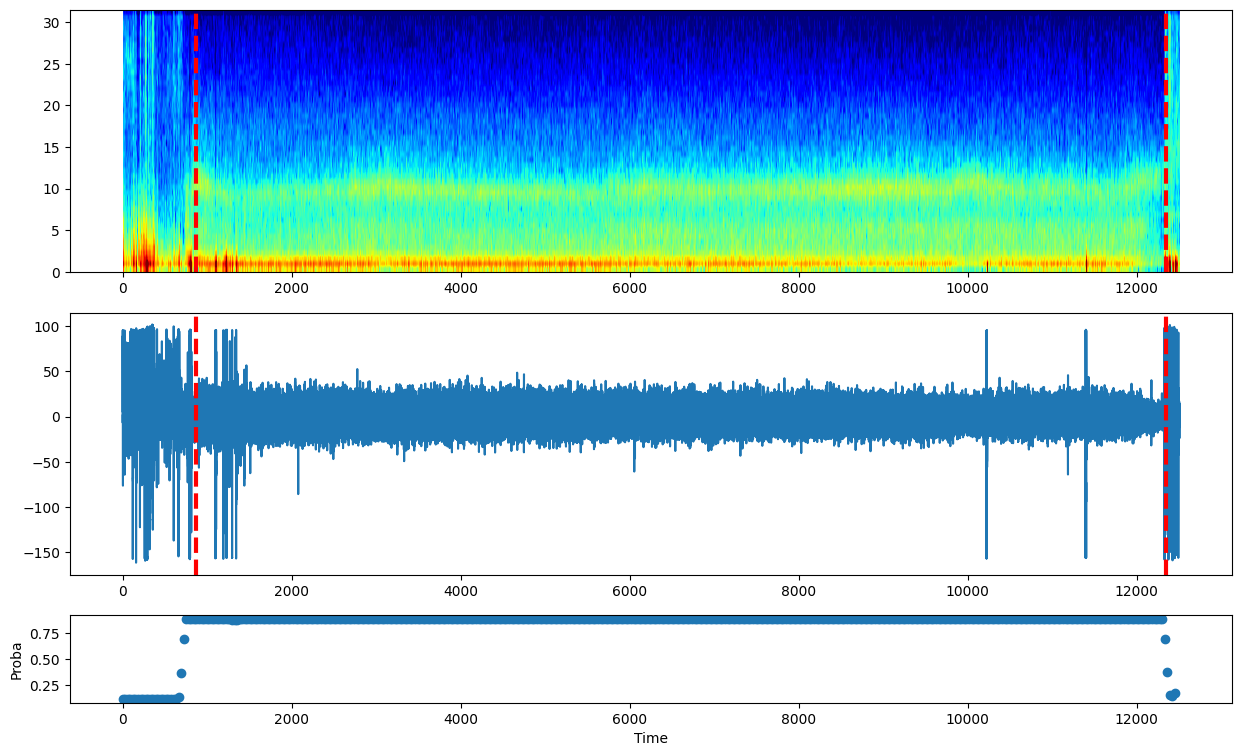

Patient 11
178.15384615384616
Creating RawArray with float64 data, n_channels=2, n_times=1895646
    Range : 0 ... 1895645 =      0.000 ... 10640.494 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=571745
    Range : 0 ... 571744 =      0.000 ...  9075.302 secs
Ready.


/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]


Effective window size : 8.127 (s)


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/eeg_features.py:151: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data(),
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/emi

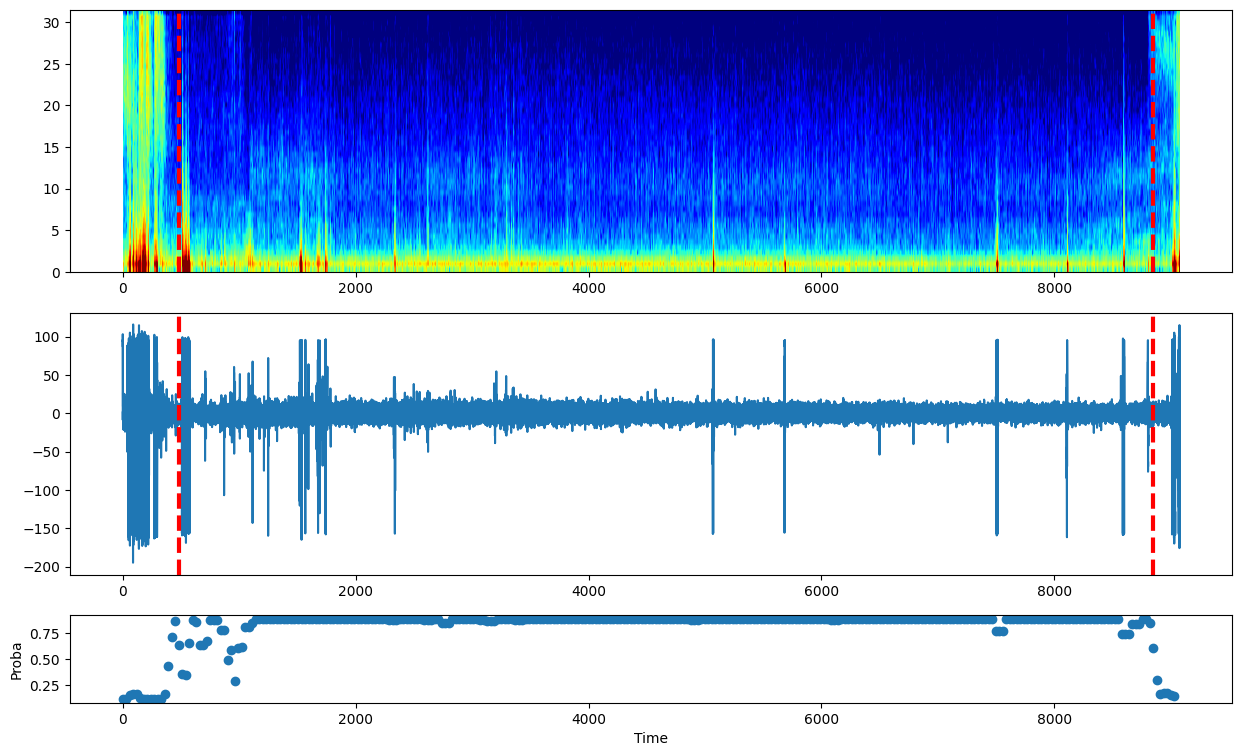

Patient 12
178.15384615384616
Creating RawArray with float64 data, n_channels=2, n_times=2159670
    Range : 0 ... 2159669 =      0.000 ... 12122.494 secs
Ready.


/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Creating RawArray with float64 data, n_channels=2, n_times=759740
    Range : 0 ... 759739 =      0.000 ... 12059.349 secs
Ready.


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]


Effective window size : 8.127 (s)


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/eeg_features.py:151: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data(),
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/emi

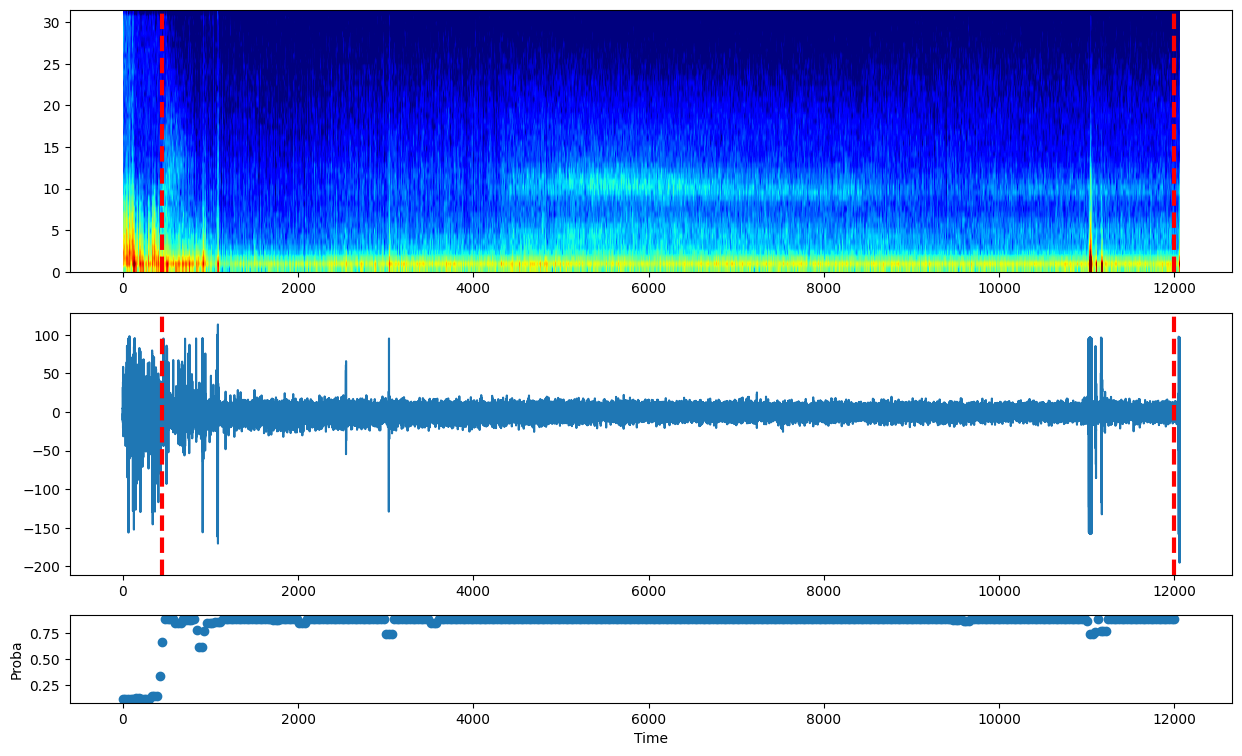

Patient 13
89.07692307692308
Creating RawArray with float64 data, n_channels=2, n_times=1134840
    Range : 0 ... 1134839 =      0.000 ... 12739.989 secs
Ready.


/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Creating RawArray with float64 data, n_channels=2, n_times=770940
    Range : 0 ... 770939 =      0.000 ... 12237.127 secs
Ready.


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]


Effective window size : 8.127 (s)


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/eeg_features.py:151: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data(),
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/emi

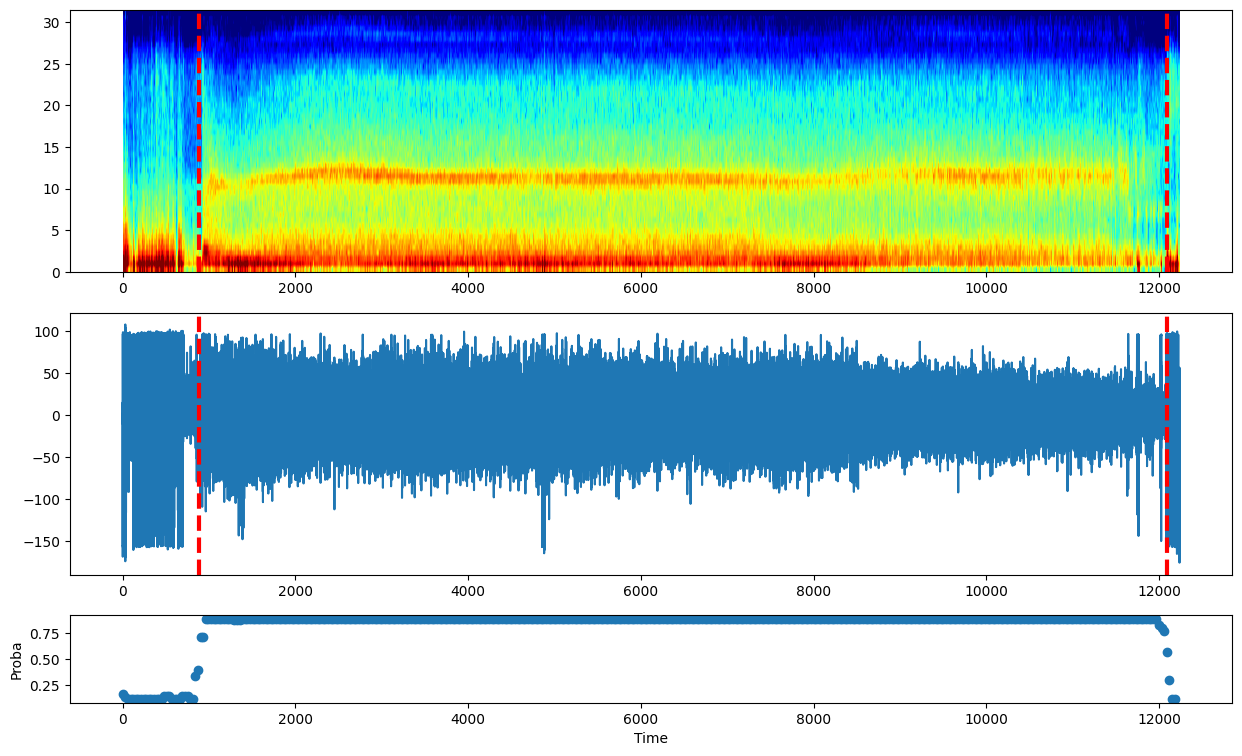

Patient 14
89.07692307692308
Creating RawArray with float64 data, n_channels=2, n_times=1269168
    Range : 0 ... 1269167 =      0.000 ... 14247.989 secs
Ready.


/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Creating RawArray with float64 data, n_channels=2, n_times=894620
    Range : 0 ... 894619 =      0.000 ... 14200.302 secs
Ready.


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]


Effective window size : 8.127 (s)


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/eeg_features.py:151: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data(),
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/emi

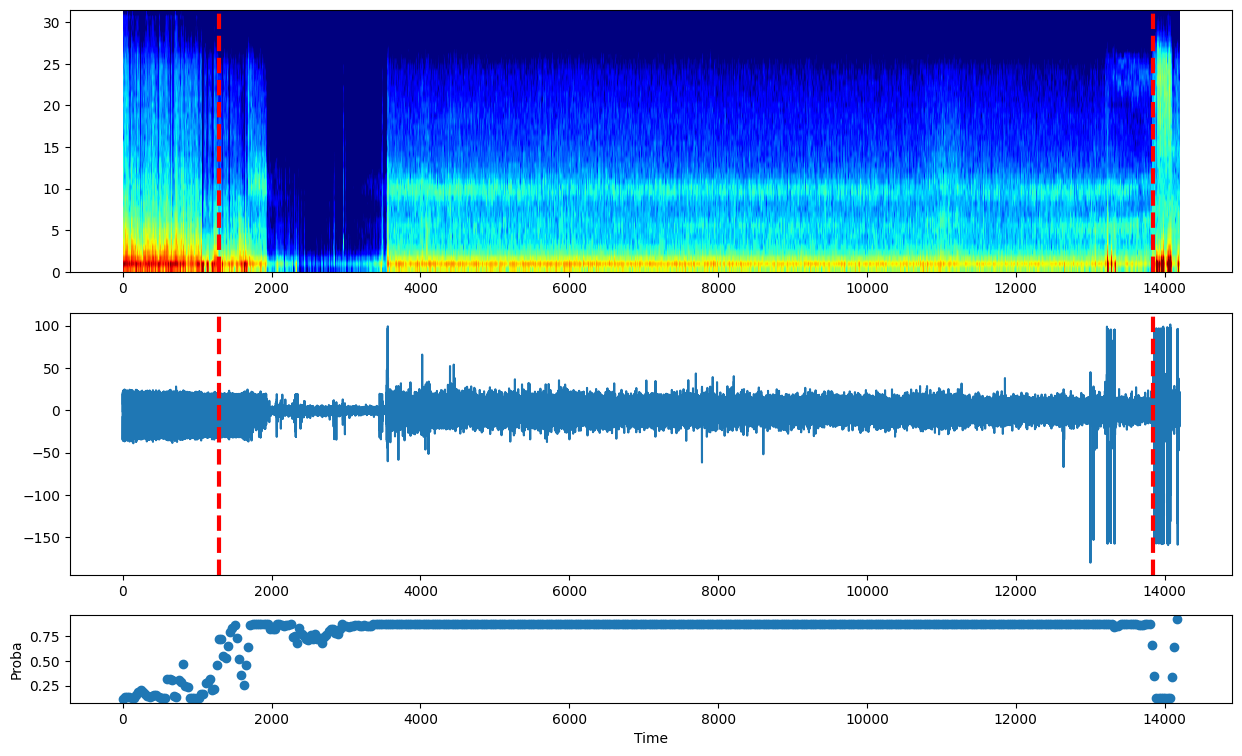

Patient 15
178.15384615384616
Creating RawArray with float64 data, n_channels=2, n_times=1833114
    Range : 0 ... 1833113 =      0.000 ... 10289.494 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=644192
    Range : 0 ... 644191 =      0.000 ... 10225.254 secs
Ready.


/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]


Effective window size : 8.127 (s)


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/eeg_features.py:151: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data(),
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/emi

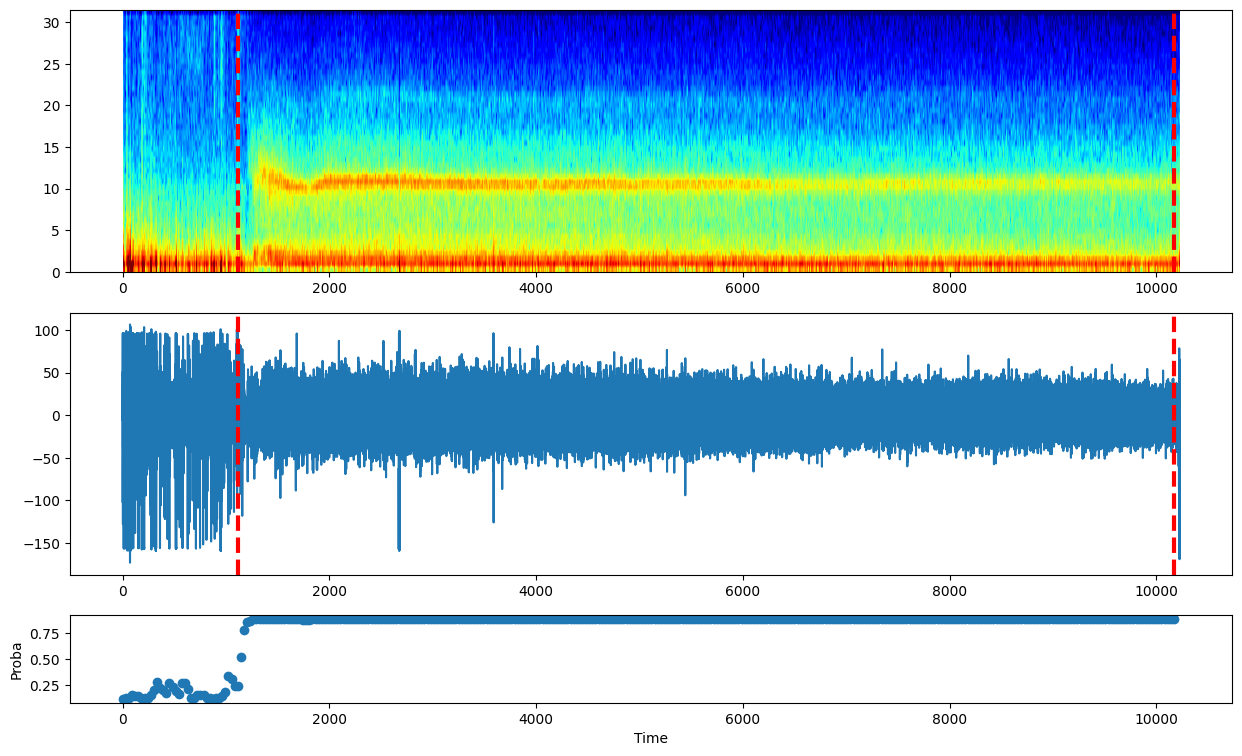

Patient 16
178.15384615384616
Creating RawArray with float64 data, n_channels=2, n_times=2314842
    Range : 0 ... 2314841 =      0.000 ... 12993.494 secs
Ready.


/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Creating RawArray with float64 data, n_channels=2, n_times=741066
    Range : 0 ... 741065 =      0.000 ... 11762.937 secs
Ready.


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]


Effective window size : 8.127 (s)


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/eeg_features.py:151: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data(),
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/emi

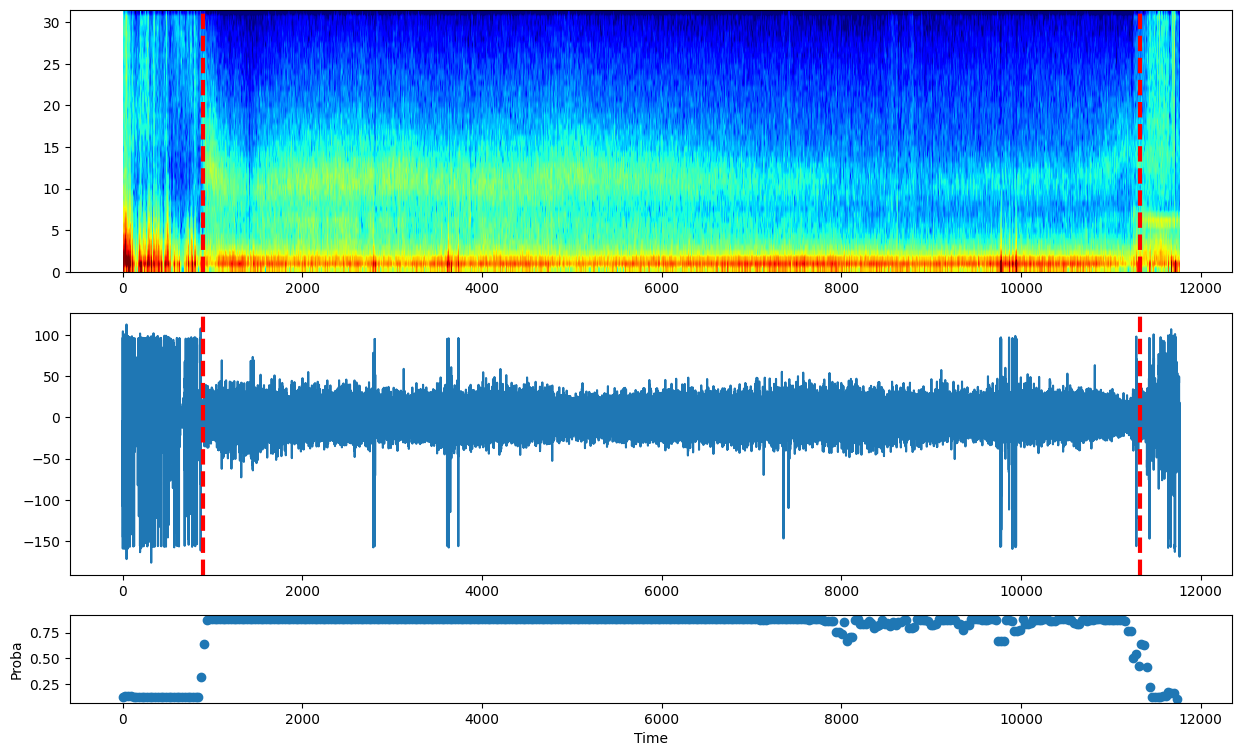

In [38]:
# Load the Parquet file
folder_path = "/home/emiliaturc/Documents/Emilia_Syr/Test_Colab"

# Sampling frequency in Hz
# sampling_frequency = 128

# Assuming you have an MNE Raw object named 'raw'
desired_frequency = 63  # The desired frequency in Hz

# Initialize an empty list to store the results
results = []

for idx_value in range(1, 17):
    print(f"Patient {idx_value}")

    (
        sampling_frequency,
        eeg_data_channel_1,
        eeg_data_channel_2,
        ce_time,
        ce_concentration,
    ) = load_data_larib(folder_path, idx_value)
    print(sampling_frequency)

    # Create MNE Raw object
    raw = create_mne_raw(
        eeg_data_channel_1 / 10**6, eeg_data_channel_2 / 10**6, sampling_frequency
    )
    # Downsample the Raw object to the desired frequency
    raw_resampled = raw.copy().resample(sfreq=desired_frequency, npad="auto")

    # Truncate the EEG data
    raw_resampled = Truncate_fif(raw_resampled)
    duration_sec = raw_resampled.n_times / raw_resampled.info["sfreq"]

    if duration_sec > 5 * 60:
        Fs = raw_resampled.info["sfreq"]  # Hz
        Fp2 = raw_resampled.get_data()[1, :] * 10**6
        times = np.linspace(
            0,
            raw_resampled.get_data().shape[1] / Fs,
            raw_resampled.get_data().shape[1],
            endpoint=False,
        )

        time_loc, time_roc, t_proba, proba = extract_loc_roc(raw_resampled)
        # Visualize Spectrogram, EEG, and proba
        plot_spectrogram(time_loc, time_roc, Fp2, Fs, times, t_proba, proba)

        # Append the results
        results.append({"idx": idx_value, "loc_time": time_loc, "roc_time": time_roc})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

In [39]:
import matplotlib.pyplot as plt

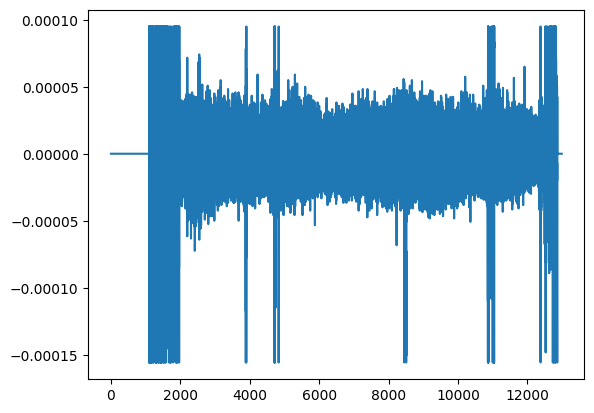

In [40]:
data, times = raw[:]
# electrode = data[electrode, :]*10**6
plt.plot(times, data[1])

In [41]:
# Save the results to a CSV file
results_df.to_csv("loc_roc_results_Emilia_syr.csv", index=False)

print("LOC and ROC times computed and saved to loc_roc_results_Emilia_syr.csv")

LOC and ROC times computed and saved to loc_roc_results_Emilia_syr.csv
